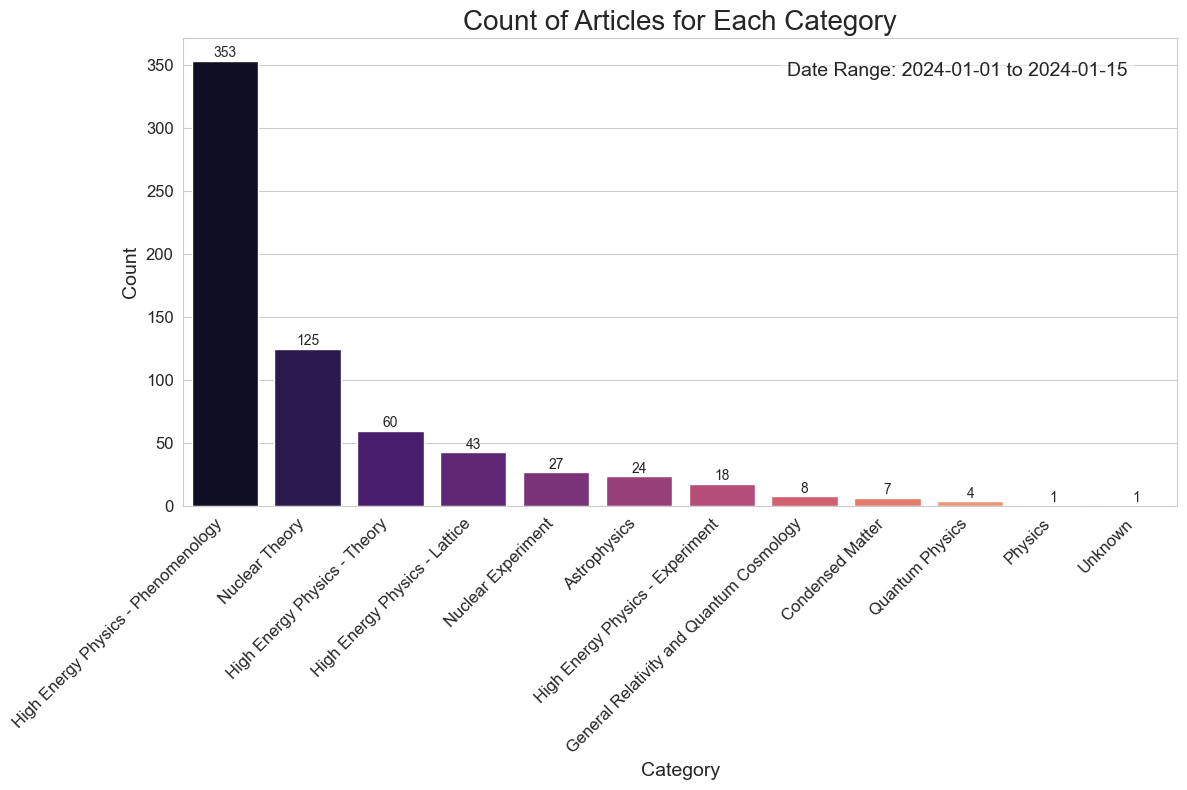

,Title,Authors,Published,Updated,Summary,ID,Categories,Real_Categories
0,Supersymmetry Structure and Phenomena,[Nir Polonsky],2001-08-29T01:48:12Z,2001-08-29T01:48:12Z,A fairly non-technical introduction to and sur...,http://arxiv.org/abs/hep-ph/0108236v1,[hep-ph],[High Energy Physics - Phenomenology]
1,q-Boson approach to multiparticle correlations,"[D. V. Anchishkin, A. M. Gavrilik, N. Z. Iorgov]",2000-10-03T10:25:50Z,2000-10-03T10:25:50Z,An approach is proposed enabling to effectivel...,http://arxiv.org/abs/hep-ph/0010019v1,[hep-ph],[High Energy Physics - Phenomenology]
2,Gauge theory of things alive and universal dyn...,[G. Mack],1994-11-28T12:26:32Z,1994-11-28T12:26:32Z,Positing complex adaptive systems made of agen...,http://arxiv.org/abs/hep-lat/9411059v1,[hep-lat],[High Energy Physics - Lattice]
3,Solar neutrinos: global analysis and implicati...,"[John N. Bahcall, Plamen I. Krastev, Alexei Yu...",2001-03-16T00:36:02Z,2001-03-20T14:53:05Z,We present a global analysis of all the availa...,http://arxiv.org/abs/hep-ph/0103179v3,[hep-ph],[High Energy Physics - Phenomenology]
4,Hints on the power corrections from current co...,"[S. Narison, V. I. Zakharov]",2001-10-10T17:32:12Z,2001-10-19T15:22:11Z,We consider an interpretation of the recent la...,http://arxiv.org/abs/hep-ph/0110141v2,[hep-ph],[High Energy Physics - Phenomenology]
...,...,...,...,...,...,...,...,...
1595,Neutral current neutrino-nucleus interactions ...,"[T. Leitner, L. Alvarez-Ruso, U. Mosel]",2006-06-28T15:41:24Z,2006-12-07T17:41:35Z,We have extended our model for charged current...,http://arxiv.org/abs/nucl-th/0606058v2,[nucl-th],[Nuclear Theory]
1596,Partial-Wave Analysis of Single-Pion Productio...,"[R. A. Arndt, W. J. Briscoe, I. I. Strakovsky,...",2006-07-10T16:43:02Z,2006-07-10T16:43:02Z,We present an overview of our efforts to analy...,http://arxiv.org/abs/nucl-th/0607017v1,[nucl-th],[Nuclear Theory]
1597,"In-medium Hadrons - Properties, Interaction an...","[Kai Gallmeister, Tina Leitner, Stefan Leupold...",2006-08-09T23:43:45Z,2006-08-09T23:43:45Z,In this talk various aspects of in-medium beha...,http://arxiv.org/abs/nucl-th/0608025v1,[nucl-th],[Nuclear Theory]
1598,Nucleon sigma term and quark condensate in nuc...,"[K. Tsushima, K. Saito, A. W. Thomas, A. Valca...",2006-08-27T11:31:46Z,2006-10-10T16:51:04Z,We study the bound nucleon sigma term and the ...,http://arxiv.org/abs/nucl-th/0608062v2,[nucl-th],[Nuclear Theory]


In [7]:
# Imports
import requests  
from bs4 import BeautifulSoup  
import pandas as pd  
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import seaborn as sns
import matplotlib.pyplot as plt

def fetch_and_visualize_arxiv_data(search_query, max_results=10, start_date=None, end_date=None, primary_category=None, categories=None):
    """
    Fetches data from the arXiv API based on specified parameters and visualizes the results.

    Parameters:
        search_query (str): The search query string.
        max_results (int): The maximum number of results to retrieve (default is 10).
        start_date (str): The start date for the search query in the format 'YYYY-MM-DD'.
        end_date (str): The end date for the search query in the format 'YYYY-MM-DD'.
        primary_category (str): The primary category of the articles.
        categories (str): Additional categories for the articles.

    Returns:
        DataFrame: A pandas DataFrame containing the fetched arXiv data.
    """
    # Fetching data from the arXiv API
    def fetch_arxiv_data(search_query, max_results, start_date, end_date, primary_category, categories):
        api_url = "http://export.arxiv.org/api/query"
        params = {
            "search_query": search_query,
            "start": 0,
            "max_results": max_results,
        }
        if start_date:
            params["start_date"] = start_date
        if end_date:
            params["end_date"] = end_date
        if primary_category:
            params["cat"] = primary_category
        if categories:
            params["categories"] = categories

        response = requests.get(api_url, params=params)
        if response.status_code == 200:
            feed = BeautifulSoup(response.content, features="html.parser")
            entries = feed.find_all('entry')
            articles = []

            for entry in entries:
                article = {}
                article['Title'] = entry.title.text
                article['Authors'] = [author.find('name').text for author in entry.find_all('author')]
                article['Published'] = entry.published.text
                article['Updated'] = entry.updated.text
                article['Summary'] = entry.summary.text.strip()
                article['ID'] = entry.id.text
                articles.append(article)

            df = pd.DataFrame(articles)
            return df
        else:
            print("Failed to retrieve data from arXiv API")
            return None

    # Fetching arXiv data
    arxiv_data = fetch_arxiv_data(search_query, max_results, start_date, end_date, primary_category, categories)

    # Extracting categories from ID
    def extract_categories(id):
        categories = re.findall(r'abs/([a-z\-]+)', id)
        return categories

    # Applying real names for categories
    def apply_real_names(categories):
        category_mapping = {
            'astro-ph': 'Astrophysics',
            'cond-mat': 'Condensed Matter',
            'cs': 'Computer Science',
            'econ': 'Economics',
            'eess': 'Electrical Engineering and Systems Science',
            'gr-qc': 'General Relativity and Quantum Cosmology',
            'hep-ex': 'High Energy Physics - Experiment',
            'hep-lat': 'High Energy Physics - Lattice',
            'hep-ph': 'High Energy Physics - Phenomenology',
            'hep-th': 'High Energy Physics - Theory',
            'math': 'Mathematics',
            'nlin': 'Nonlinear Sciences',
            'nucl-ex': 'Nuclear Experiment',
            'nucl-th': 'Nuclear Theory',
            'physics': 'Physics',
            'q-bio': 'Quantitative Biology',
            'q-fin': 'Quantitative Finance',
            'quant-ph': 'Quantum Physics',
        }
        return [category_mapping.get(category, 'Unknown') for category in categories]

    # Applying real names for categories
    arxiv_data['Categories'] = arxiv_data['ID'].apply(extract_categories)
    arxiv_data['Real_Categories'] = arxiv_data['Categories'].apply(apply_real_names)

    # Plotting
    sns.set_style("whitegrid")
    category_counts = arxiv_data['Real_Categories'].explode().value_counts()

    plt.figure(figsize=(12, 8))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='magma')
    plt.title('Count of Articles for Each Category', fontsize=20)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    for index, value in enumerate(category_counts):
        plt.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=10)

    date_range_text = f'Date Range: {start_date} to {end_date}'
    plt.text(0.95, 0.95, date_range_text, transform=plt.gca().transAxes, fontsize=14,
             verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()
    plt.show()

    return arxiv_data

# Call the function with appropriate parameters
search_query = "cat:cs OR cat:physics OR cat:math OR cat:q-bio OR cat:q-fin OR cat:stat OR cat:econ OR cat:eess OR cat:astro-ph OR cat:cond-mat OR cat:gr-qc OR cat:hep-ex OR cat:hep-lat OR cat:hep-ph OR cat:hep-th OR cat:nucl-ex OR cat:nucl-th OR cat:quant-ph"
max_results = 2000
start_date = "2024-01-01"
end_date = "2024-01-15"

fetch_and_visualize_arxiv_data(search_query, max_results, start_date, end_date)